#Libraries

In [83]:
#libraries
import torch
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from torch import nn
import requests
from pathlib import Path
from sklearn.metrics import classification_report
import numpy as np
import torchmetrics

#Extra:we are importing a function to better visualize the working of our model


In [71]:

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

#Preparing the dataset

In [4]:
#preparing the dataset
#setting the hyperparameter
no_of_classes=4
no_of_features=2
no_of_samples=1000

X,y=make_blobs(no_of_samples,no_of_features,centers=no_of_classes,cluster_std=1.5,random_state=42)
X[:10],y[:10]

(array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475],
        [-6.7941075 , -6.47722117],
        [ 5.21017561,  2.8890483 ],
        [-5.50513568, -6.36037688],
        [-6.54375599, -4.83389895],
        [ 6.44964229,  0.74776618]]),
 array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1]))

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

Converting data into tensors

In [10]:
#converting the data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)


TypeError: expected np.ndarray (got Tensor)

In [14]:
X.shape,y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

visualization

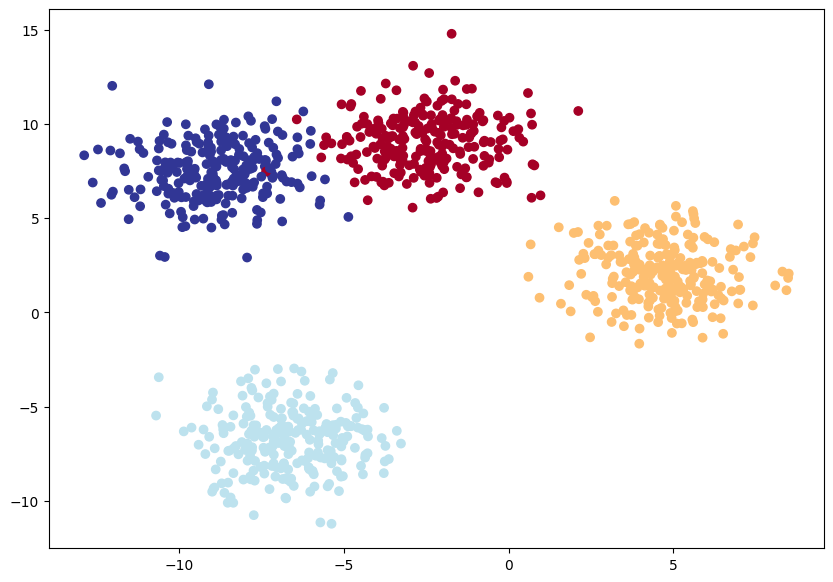

In [17]:
#visualization
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

Splitting

In [18]:
#spliting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

#Building an model

In [40]:
#building an model
model=nn.Sequential(
  nn.Linear(in_features=2,out_features=10),
  nn.ReLU(),
  nn.Linear(in_features=10,out_features=10),
  nn.ReLU(),
  nn.Linear(in_features=10,out_features=4),

)

In [36]:
model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=4, bias=True)
)

setting an optimizer and loss_function

In [41]:
#setting an optimizer and loss_function
loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

making untrain prediction and let see what happen

In [46]:
#making untrain prediction and let see what happen
model.eval()
with torch.inference_mode():
  logits_without_training=model(X_test)

#coverting raw output to probabilites
untrain_pred=torch.softmax(logits_without_training,dim=1)
untrain_pred[:10]

#now converting them to labels
untrain_pred=torch.argmax(untrain_pred,dim=1)
untrain_pred[:10],y_test[:10]

(tensor([1, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.]))

In [58]:
#Convert the target labels to Long type. because cross entropy loss function expect long type
y_train = y_train.long()  # Ensure labels are of type Long
y_test = y_test.long()


#creating a testing and traing loop

In [72]:
#creating a testing and traing loop
def train_and_test(model,loss_fn,optimizer,epochs=100):

  for epoch in range(epochs):
  #TRAIN
    #setting model to train
    model.train()
    #doing the forward pass
    logits_ontrain=model(X_train)
    #converting the raw output into probabilties
    pred_train=torch.softmax(logits_ontrain,dim=1)
    #converting them to labels
    pred_train=torch.argmax(pred_train,dim=1)
    #calculting the loss on logit as cross entropy work on logits
    loss_train=loss_fn(logits_ontrain,y_train)
    #setting zero grad
    optimizer.zero_grad()
    #doing backward pass
    loss_train.backward()
    #updating the parameters
    optimizer.step()
  #TEST
    #setting to test mode
    model.eval()
    with torch.inference_mode():
      logits_ontest=model(X_test)
      pred_test=torch.softmax(logits_ontest,dim=1)
      pred_test=torch.argmax(pred_test,dim=1)
      loss_test=loss_fn(logits_ontest,y_test)

    # Print out what's happenin
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss_train}| Test loss: {loss_test}")


In [73]:
train_and_test(model,loss_fn,optimizer,1000)

Epoch: 0 | Loss: 0.024334663525223732| Test loss: 0.009118064306676388
Epoch: 100 | Loss: 0.022489996626973152| Test loss: 0.008770260028541088
Epoch: 200 | Loss: 0.021483618766069412| Test loss: 0.008755057118833065
Epoch: 300 | Loss: 0.020902730524539948| Test loss: 0.008803615346550941
Epoch: 400 | Loss: 0.020531730726361275| Test loss: 0.00882966723293066
Epoch: 500 | Loss: 0.020263580605387688| Test loss: 0.008812966756522655
Epoch: 600 | Loss: 0.020036129280924797| Test loss: 0.008621457032859325
Epoch: 700 | Loss: 0.01986023597419262| Test loss: 0.008533554151654243
Epoch: 800 | Loss: 0.019597191363573074| Test loss: 0.008261851966381073
Epoch: 900 | Loss: 0.019414423033595085| Test loss: 0.008149206638336182


#Visualization of result

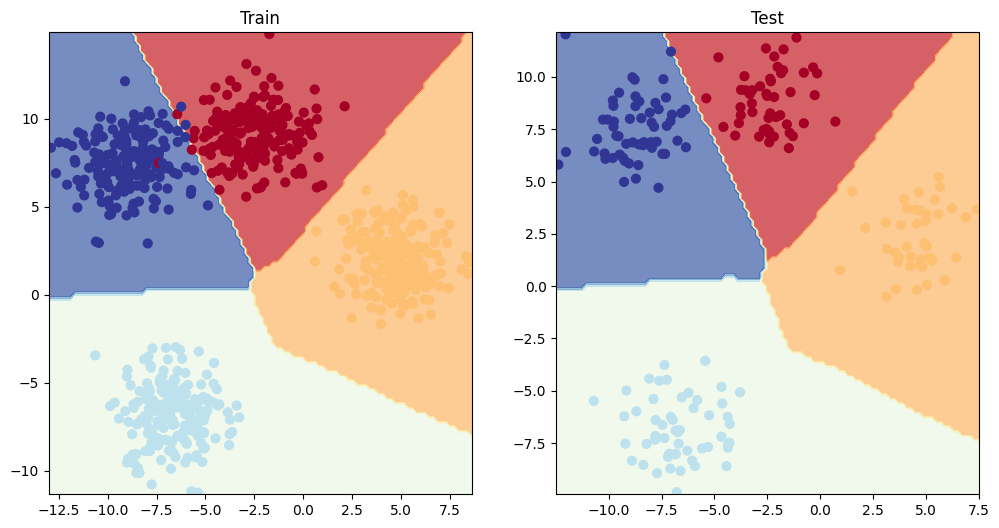

In [76]:
#visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [77]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 14.9 MB/s eta 0:00:00


In [82]:
#making  prediction
model.eval()
with torch.inference_mode():
  logits=model(X_test)

#coverting raw output to probabilites
y_pred=torch.softmax(logits,dim=1)

#now converting them to labels
y_pred=torch.argmax(y_pred,dim=1)

In [88]:
print(y_pred.shape)
print(y_train.shape)


torch.Size([200])
torch.Size([800])


# Model evaluation

In [89]:
import torchmetrics
from sklearn.metrics import classification_report

# Initialize metric objects with the correct task argument
accuracy = torchmetrics.classification.Accuracy(task="multiclass", num_classes=4)
precision = torchmetrics.classification.Precision(task="multiclass", num_classes=4, average='macro')
recall = torchmetrics.classification.Recall(task="multiclass", num_classes=4, average='macro')
f1 = torchmetrics.classification.F1Score(task="multiclass", num_classes=4, average='macro')
confusion_matrix = torchmetrics.classification.ConfusionMatrix(task="multiclass", num_classes=4)

# Calculate metrics
accuracy_value = accuracy(y_pred, y_test)
precision_value = precision(y_pred, y_test)
recall_value = recall(y_pred, y_test)
f1_value = f1(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)

# Print the results
print(f'Accuracy: {accuracy_value.item():.4f}')
print(f'Precision: {precision_value.item():.4f}')
print(f'Recall: {recall_value.item():.4f}')
print(f'F1 Score: {f1_value.item():.4f}')
print(f'Confusion Matrix:\n{cm}')

# Get classification report using sklearn
y_test_np = y_test.cpu().numpy()  # Ensure to move tensors to CPU if they're on GPU
y_pred_np = y_pred.cpu().numpy()
print("Classification Report:")
print(classification_report(y_test_np, y_pred_np))


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
tensor([[49,  0,  0,  0],
        [ 0, 41,  0,  0],
        [ 0,  0, 53,  0],
        [ 0,  0,  0, 57]])
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

